In [1]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import var as var
import sys
import re

sys.path.insert(1, './script/')
import censo as scINEP
import ibge as scIBGE
import caged as scCAGED

In [2]:
dataFrameINEP = pd.read_csv(f'./result/INEP.csv')
dataFrameCAGED = pd.read_csv(f'./result/CAGED.csv')
dataFrameIBGE = pd.read_csv(f'./result/IBGE.csv')

In [3]:
dataFrameINEP[var.CAGED_COLUMNS] = dataFrameCAGED[var.CAGED_COLUMNS]
dataFrameINEP[var.IBGE_COLUMNS] = dataFrameIBGE[var.IBGE_COLUMNS]

In [4]:
dataFrameINEPPublico = dataFrameINEP[dataFrameINEP['C_TP_REDE'] == 1]
dataFrameINEPPrivado = dataFrameINEP[dataFrameINEP['C_TP_REDE'] == 2]

In [5]:
idhm =  pd.read_csv(f'./data/ibge/idh/data.csv', sep=';')
idhm['Município'] = idhm['Município'].apply(lambda x: re.sub(r'\s\(\w+\)', '', x))

validIdhm = idhm[idhm['Município'].isin(dataFrameINEP['NO_MUNICIPIO'].unique())]

In [6]:
vagas = False
method = 'pearson'

In [7]:
keycolumn = 'NO_MUNICIPIO'

def meanMethod(dataFrameGroup, vagas=False):

    if vagas:
        dataFrameGroup = dataFrameGroup.loc[dataFrameGroup['C_QT_VG_NOVA'] != 0]
        
        for col in var.INEP_COLUMNS:
            dataFrameGroup['MEDIA_' + col] = dataFrameGroup[col]/dataFrameGroup['C_QT_VG_NOVA']
    else:
        for col in var.INEP_COLUMNS:
            dataFrameGroup['MEDIA_' + col] = dataFrameGroup[col]/dataFrameGroup[col].sum()

    return dataFrameGroup

def notByYear(dataFrame, mean=False, median=False, std=False, varc=False, sem=False):
    colunas = var.INEP_COLUMNS + var.CAGED_COLUMNS + var.IBGE_COLUMNS
    
    if mean:
        # Compute mean of groups
        return dataFrame[[keycolumn] + colunas].groupby([keycolumn]).mean().reset_index()
    elif median:
        # Compute median of groups
        return dataFrame[[keycolumn] + colunas].groupby([keycolumn]).median().reset_index()
    elif std:
        # Compute standard deviation of groups
        return dataFrame[[keycolumn] + colunas].groupby([keycolumn]).std().reset_index()
    elif varc:
        # Compute variance of groups
        return dataFrame[[keycolumn] + colunas].groupby([keycolumn]).var().reset_index()
    elif sem:
        # Compute standard error of the mean of groups
        return dataFrame[[keycolumn] + colunas].groupby([keycolumn]).sem().reset_index()
    else:
        # Compute sum of group values
        return dataFrame[[keycolumn] + colunas].groupby([keycolumn]).sum().reset_index()

def returnGroupedByMunicipio(dataFrame, vagas=False, notMean=False, mean=False, median=False, std=False, var=False, sem=False):
    
    dataFrameGroup = notByYear(dataFrame, mean, median, std, var, sem)

    if not notMean:
        dataFrameGroup = meanMethod(dataFrameGroup, vagas)

    dataFrameGroup['IDHM'] = 0
    for nomeMunicipio in dataFrameGroup['NO_MUNICIPIO'].unique().tolist():
        idhmMunicipio = validIdhm[validIdhm['Município'] == nomeMunicipio]

        if len(idhmMunicipio) == 0:
            continue
        
        dataFrameGroup.loc[dataFrameGroup['NO_MUNICIPIO'] == nomeMunicipio, 'IDHM'] = float(idhmMunicipio['IDHM 2010'].astype(str).values[0].replace(',', '.'))
        
    return dataFrameGroup


In [8]:
dataFrameGroup = returnGroupedByMunicipio(dataFrameINEP, vagas, True, median=False)

In [9]:
dataFrameGroupPrivado = returnGroupedByMunicipio(dataFrameINEPPrivado, vagas, True)
dataFrameGroupPrivado.corr(method=method)

C:\Users\aliss\AppData\Local\Temp\ipykernel_19112\2543308858.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataFrameGroupPrivado.corr(method=method)


,INEP_CURSO_QUANTIDADE_MATRICULADOS,INEP_CURSO_QUANTIDADE_INGRESSANTES,INEP_CURSO_QUANTIDADE_CONCLUINTES,INEP_CURSO_QUANTIDADE_VAGAS_NOVAS,INEP_CURSO_QUANTIDADE_VAGAS_TOTAL,INEP_CURSO_QUANTIDADE_INSCRITOS_VAGAS_NOVAS,INEP_CURSO_QUANTIDADE_INSCRITOS_TOTAL,INEP_CURSO_QUANTIDADE_ALUNOS_SITUACAO_TRANCADA,INEP_CURSO_QUANTIDADE_ALUNOS_SITUACAO_TRANSFERIDO,INEP_CURSO_QUANTIDADE_ALUNOS_APOIO_SOCIAL,...,CAGED_MUNICIPIO_ADMISSOES_IDADE,CAGED_MUNICIPIO_DESLIGAMENTOS_IDADE,CAGED_MUNICIPIO_HORA_CONTRATO,CAGED_MUNICIPIO_SALARIO_MINIMO,CAGED_MUNICIPIO_SALDO,CAGED_MUNICIPIO_DIFERENCA_ADMISSAO,IBGE_MUNICIPIO_PIB,IBGE_MUNICIPIO_POP,IBGE_MUNICIPIO_PIBPERCAPTA,IDHM
INEP_CURSO_QUANTIDADE_MATRICULADOS,1.000000,0.996249,0.989946,0.982937,0.988121,0.977530,0.981350,0.953001,0.967866,0.161288,...,0.919458,0.918989,0.912933,0.975508,-0.946908,0.946908,0.962428,0.970467,0.919046,0.101482
INEP_CURSO_QUANTIDADE_INGRESSANTES,0.996249,1.000000,0.991083,0.990093,0.992161,0.988344,0.991480,0.949734,0.968692,0.161193,...,0.915392,0.914721,0.909026,0.975945,-0.958761,0.958761,0.972068,0.978086,0.919033,0.097306
INEP_CURSO_QUANTIDADE_CONCLUINTES,0.989946,0.991083,1.000000,0.988440,0.987498,0.982871,0.988423,0.923796,0.961175,0.138403,...,0.900876,0.900149,0.894995,0.966728,-0.966976,0.966976,0.976621,0.979539,0.917006,0.097681
INEP_CURSO_QUANTIDADE_VAGAS_NOVAS,0.982937,0.990093,0.988440,1.000000,0.997307,0.984895,0.989469,0.928601,0.956764,0.135775,...,0.926602,0.925832,0.920830,0.981749,-0.954028,0.954028,0.969340,0.973191,0.937598,0.102537
INEP_CURSO_QUANTIDADE_VAGAS_TOTAL,0.988121,0.992161,0.987498,0.997307,1.000000,0.981153,0.986099,0.937187,0.962471,0.141646,...,0.934227,0.933573,0.927905,0.985275,-0.948786,0.948786,0.966399,0.972695,0.937486,0.103412
INEP_CURSO_QUANTIDADE_INSCRITOS_VAGAS_NOVAS,0.977530,0.988344,0.982871,0.984895,0.981153,1.000000,0.998189,0.920618,0.946515,0.132457,...,0.902150,0.901178,0.896983,0.963155,-0.955905,0.955905,0.962299,0.966111,0.908627,0.083699
INEP_CURSO_QUANTIDADE_INSCRITOS_TOTAL,0.981350,0.991480,0.988423,0.989469,0.986099,0.998189,1.000000,0.923681,0.954103,0.139148,...,0.900908,0.899904,0.895104,0.965479,-0.963346,0.963346,0.972314,0.975112,0.911409,0.083395
INEP_CURSO_QUANTIDADE_ALUNOS_SITUACAO_TRANCADA,0.953001,0.949734,0.923796,0.928601,0.937187,0.920618,0.923681,1.000000,0.942785,0.233710,...,0.880490,0.880039,0.872960,0.934823,-0.868403,0.868403,0.898562,0.904908,0.889496,0.102902
INEP_CURSO_QUANTIDADE_ALUNOS_SITUACAO_TRANSFERIDO,0.967866,0.968692,0.961175,0.956764,0.962471,0.946515,0.954103,0.942785,1.000000,0.273991,...,0.870302,0.869717,0.863050,0.944791,-0.949761,0.949761,0.958212,0.961579,0.891328,0.098433
INEP_CURSO_QUANTIDADE_ALUNOS_APOIO_SOCIAL,0.161288,0.161193,0.138403,0.135775,0.141646,0.132457,0.139148,0.233710,0.273991,1.000000,...,0.110326,0.110991,0.113221,0.137321,-0.145966,0.145966,0.144843,0.143480,0.109011,-0.002373


In [10]:
dataFrameGroupPublico = returnGroupedByMunicipio(dataFrameINEPPublico, notMean=True)
dataFrameGroupPublico.corr(method=method)

C:\Users\aliss\AppData\Local\Temp\ipykernel_19112\2270401688.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataFrameGroupPublico.corr(method=method)


,INEP_CURSO_QUANTIDADE_MATRICULADOS,INEP_CURSO_QUANTIDADE_INGRESSANTES,INEP_CURSO_QUANTIDADE_CONCLUINTES,INEP_CURSO_QUANTIDADE_VAGAS_NOVAS,INEP_CURSO_QUANTIDADE_VAGAS_TOTAL,INEP_CURSO_QUANTIDADE_INSCRITOS_VAGAS_NOVAS,INEP_CURSO_QUANTIDADE_INSCRITOS_TOTAL,INEP_CURSO_QUANTIDADE_ALUNOS_SITUACAO_TRANCADA,INEP_CURSO_QUANTIDADE_ALUNOS_SITUACAO_TRANSFERIDO,INEP_CURSO_QUANTIDADE_ALUNOS_APOIO_SOCIAL,...,CAGED_MUNICIPIO_ADMISSOES_IDADE,CAGED_MUNICIPIO_DESLIGAMENTOS_IDADE,CAGED_MUNICIPIO_HORA_CONTRATO,CAGED_MUNICIPIO_SALARIO_MINIMO,CAGED_MUNICIPIO_SALDO,CAGED_MUNICIPIO_DIFERENCA_ADMISSAO,IBGE_MUNICIPIO_PIB,IBGE_MUNICIPIO_POP,IBGE_MUNICIPIO_PIBPERCAPTA,IDHM
INEP_CURSO_QUANTIDADE_MATRICULADOS,1.000000,0.964558,0.913596,0.867125,0.857947,0.808508,0.849302,0.759021,0.475392,0.667237,...,0.830629,0.834695,0.801722,0.841880,-0.326517,0.326517,0.560337,0.619631,0.682734,0.163293
INEP_CURSO_QUANTIDADE_INGRESSANTES,0.964558,1.000000,0.851923,0.907515,0.898627,0.790601,0.823902,0.753942,0.470364,0.675238,...,0.819453,0.822492,0.789952,0.815491,-0.275930,0.275930,0.559954,0.608705,0.686908,0.125133
INEP_CURSO_QUANTIDADE_CONCLUINTES,0.913596,0.851923,1.000000,0.787947,0.775978,0.709400,0.755035,0.647537,0.449068,0.503481,...,0.772426,0.776837,0.751397,0.795758,-0.353735,0.353735,0.451747,0.503042,0.666898,0.245088
INEP_CURSO_QUANTIDADE_VAGAS_NOVAS,0.867125,0.907515,0.787947,1.000000,0.977052,0.657482,0.694737,0.727616,0.498114,0.545310,...,0.776858,0.774750,0.762163,0.733326,-0.220938,0.220938,0.454840,0.501592,0.670275,0.142284
INEP_CURSO_QUANTIDADE_VAGAS_TOTAL,0.857947,0.898627,0.775978,0.977052,1.000000,0.632990,0.673180,0.711883,0.589745,0.546259,...,0.776083,0.772978,0.762590,0.739443,-0.216182,0.216182,0.450438,0.491776,0.677606,0.141813
INEP_CURSO_QUANTIDADE_INSCRITOS_VAGAS_NOVAS,0.808508,0.790601,0.709400,0.657482,0.632990,1.000000,0.979965,0.660711,0.270986,0.539249,...,0.690073,0.694434,0.653532,0.733431,-0.417193,0.417193,0.557564,0.629667,0.528011,0.054445
INEP_CURSO_QUANTIDADE_INSCRITOS_TOTAL,0.849302,0.823902,0.755035,0.694737,0.673180,0.979965,1.000000,0.692112,0.275493,0.566679,...,0.747816,0.750846,0.713193,0.781362,-0.411193,0.411193,0.576100,0.648327,0.580542,0.087666
INEP_CURSO_QUANTIDADE_ALUNOS_SITUACAO_TRANCADA,0.759021,0.753942,0.647537,0.727616,0.711883,0.660711,0.692112,1.000000,0.393223,0.583114,...,0.713199,0.714552,0.680758,0.715854,-0.219352,0.219352,0.528070,0.617948,0.558787,0.139756
INEP_CURSO_QUANTIDADE_ALUNOS_SITUACAO_TRANSFERIDO,0.475392,0.470364,0.449068,0.498114,0.589745,0.270986,0.275493,0.393223,1.000000,0.320972,...,0.338164,0.339541,0.329149,0.423076,-0.163750,0.163750,0.215306,0.231919,0.380614,0.184732
INEP_CURSO_QUANTIDADE_ALUNOS_APOIO_SOCIAL,0.667237,0.675238,0.503481,0.545310,0.546259,0.539249,0.566679,0.583114,0.320972,1.000000,...,0.597734,0.601850,0.545471,0.743848,-0.287000,0.287000,0.789722,0.805477,0.586391,0.094529


In [11]:
dataFrameGroupCorr = dataFrameGroup.corr(method=method)
dataFrameGroup

C:\Users\aliss\AppData\Local\Temp\ipykernel_19112\1355542712.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataFrameGroupCorr = dataFrameGroup.corr(method=method)


,NO_MUNICIPIO,INEP_CURSO_QUANTIDADE_MATRICULADOS,INEP_CURSO_QUANTIDADE_INGRESSANTES,INEP_CURSO_QUANTIDADE_CONCLUINTES,INEP_CURSO_QUANTIDADE_VAGAS_NOVAS,INEP_CURSO_QUANTIDADE_VAGAS_TOTAL,INEP_CURSO_QUANTIDADE_INSCRITOS_VAGAS_NOVAS,INEP_CURSO_QUANTIDADE_INSCRITOS_TOTAL,INEP_CURSO_QUANTIDADE_ALUNOS_SITUACAO_TRANCADA,INEP_CURSO_QUANTIDADE_ALUNOS_SITUACAO_TRANSFERIDO,...,CAGED_MUNICIPIO_ADMISSOES_IDADE,CAGED_MUNICIPIO_DESLIGAMENTOS_IDADE,CAGED_MUNICIPIO_HORA_CONTRATO,CAGED_MUNICIPIO_SALARIO_MINIMO,CAGED_MUNICIPIO_SALDO,CAGED_MUNICIPIO_DIFERENCA_ADMISSAO,IBGE_MUNICIPIO_PIB,IBGE_MUNICIPIO_POP,IBGE_MUNICIPIO_PIBPERCAPTA,IDHM
0,Adamantina,1200.0,393.0,147.0,1440,1440,464,979,140.0,11.0,...,329.373077,298.366667,497.860440,16.338584,-17.0,17.0,8.973471e+06,347414,257.783348,0.790
1,Alegre,1349.0,384.0,40.0,507,678,2211,3107,52.0,11.0,...,295.914286,303.338095,466.928571,12.601146,-5.0,5.0,4.184865e+06,314146,133.128608,0.721
2,Alegrete,1587.0,694.0,122.0,617,828,2870,5602,143.0,18.0,...,312.788889,314.476190,380.000000,15.970256,-11.0,11.0,1.663120e+07,773098,215.912220,0.740
3,Alfenas,3910.0,1110.0,531.0,1497,1778,4469,7334,349.0,28.0,...,520.258395,661.193240,850.355891,33.457521,-80.0,80.0,4.055848e+07,1554456,519.144036,0.761
4,Alto Araguaia,548.0,335.0,16.0,520,687,1413,2024,67.0,2.0,...,170.547619,142.733333,259.314286,6.437892,-4.0,4.0,5.819571e+06,125247,325.074971,0.704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,Vitória,5672.0,1700.0,510.0,2051,2813,3428,7486,614.0,28.0,...,804.574900,840.798450,1074.007708,104.339755,-1412.0,1412.0,4.950106e+08,7686664,1417.726558,0.845
228,Vitória da Conquista,2084.0,490.0,167.0,507,860,4716,7294,45.0,0.0,...,325.522101,327.858533,513.477053,15.217538,-8.0,8.0,5.456506e+07,3337482,162.507836,0.678
229,Viçosa,2048.0,585.0,271.0,495,569,3236,5431,120.0,27.0,...,324.859607,332.398857,473.736151,20.343003,-30.0,30.0,1.299448e+07,763876,169.174462,0.775
230,Votorantim,74.0,85.0,6.0,500,500,100,286,35.0,1.0,...,135.733333,163.333333,218.083333,8.580245,-1.0,1.0,1.671954e+07,570638,145.425448,0.767


In [12]:
def retornaValorDummies(valor):
    valor = abs(valor)
    if valor >= 0 and valor <= 0.199: return 0.2
    elif valor >= 0.2 and valor <= 0.3999: return 0.4
    elif valor >= 0.4 and valor <= 0.6999: return 0.6
    elif valor >= 0.7 and valor <= 0.8999: return 0.8
    elif valor >= 0.9 and valor <= 1: return 1

def heatMap(dataFrame, columns):
    dataFrame = dataFrame[columns]
    corr = dataFrame.corr(method='spearman')
    corr = corr.apply(lambda x: x.apply(lambda y: retornaValorDummies(y)))

    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True

    labels = []
    for idx, col in enumerate(columns):
        labels.append(var.LABELS[col])

    plt.figure(figsize=(50, 30))
    sns.set(font_scale=3)
    sns.set_style("white")
    plt.title(f'Correlação das váriáveis')

    perfect_patch = mpatches.Patch(color='#b40426', label='Muito Forte')
    very_strong_patch = mpatches.Patch(color='#d65244', label='Forte')
    strong_patch = mpatches.Patch(color='#ee8468', label='Moderada')
    medium_patch = mpatches.Patch(color='#f7ac8e', label='Fraca')
    yeak_patch = mpatches.Patch(color='#f2cbb7', label='Muito Fraca')
    plt.legend(handles=[perfect_patch, very_strong_patch, strong_patch, medium_patch, yeak_patch])

    sns.heatmap(corr, xticklabels=labels, cmap='coolwarm', yticklabels=labels, annot=False, mask=mask, robust=True, fmt='.2f', vmin=-1, vmax=1, cbar=False, linewidths=1, square=True)
    plt.savefig(f'./result/Heatmap variáveis muncipais.png')

In [13]:
inep = [
    'INEP_CURSO_QUANTIDADE_MATRICULADOS',
    'INEP_CURSO_QUANTIDADE_INGRESSANTES',
    'INEP_CURSO_QUANTIDADE_CONCLUINTES',
    'INEP_CURSO_QUANTIDADE_VAGAS_NOVAS',
    'INEP_CURSO_QUANTIDADE_VAGAS_TOTAL',
    'INEP_CURSO_QUANTIDADE_INSCRITOS_VAGAS_NOVAS',
    'INEP_CURSO_QUANTIDADE_INSCRITOS_TOTAL',
    'INEP_CURSO_QUANTIDADE_ALUNOS_DEFICIENTES',
    'INEP_CURSO_EVASAO',
    'INEP_CURSO_PERMANENCIA',
    'INEP_CURSO_QUANTIDADE_VETERANOS',
    'INEP_CURSO_CONCORRENCIA_VAGAS',
    'INEP_CURSO_DIFERENCA_VAGAS_ANO_ANTERIOR',
    'INEP_IES_QUANTIDADE_ALUNOS_DEFICIENTES',
    'INEP_IES_QUANTIDADE_DOCENTES_EXERCICIO'
]

caged = [
    'CAGED_MUNICIPIO_ADMISSOES',
    'CAGED_MUNICIPIO_DESLIGAMENTOS',
    'CAGED_MUNICIPIO_SALARIO',
    'CAGED_MUNICIPIO_ADMISSOES_IDADE',
    'CAGED_MUNICIPIO_DESLIGAMENTOS_IDADE',
    'CAGED_MUNICIPIO_SALARIO_MINIMO',
    'CAGED_MUNICIPIO_SALDO',
]

ibge = [
    'IBGE_MUNICIPIO_PIB',
    'IBGE_MUNICIPIO_POP',
    'IBGE_MUNICIPIO_PIBPERCAPTA',
    'IDHM',
]

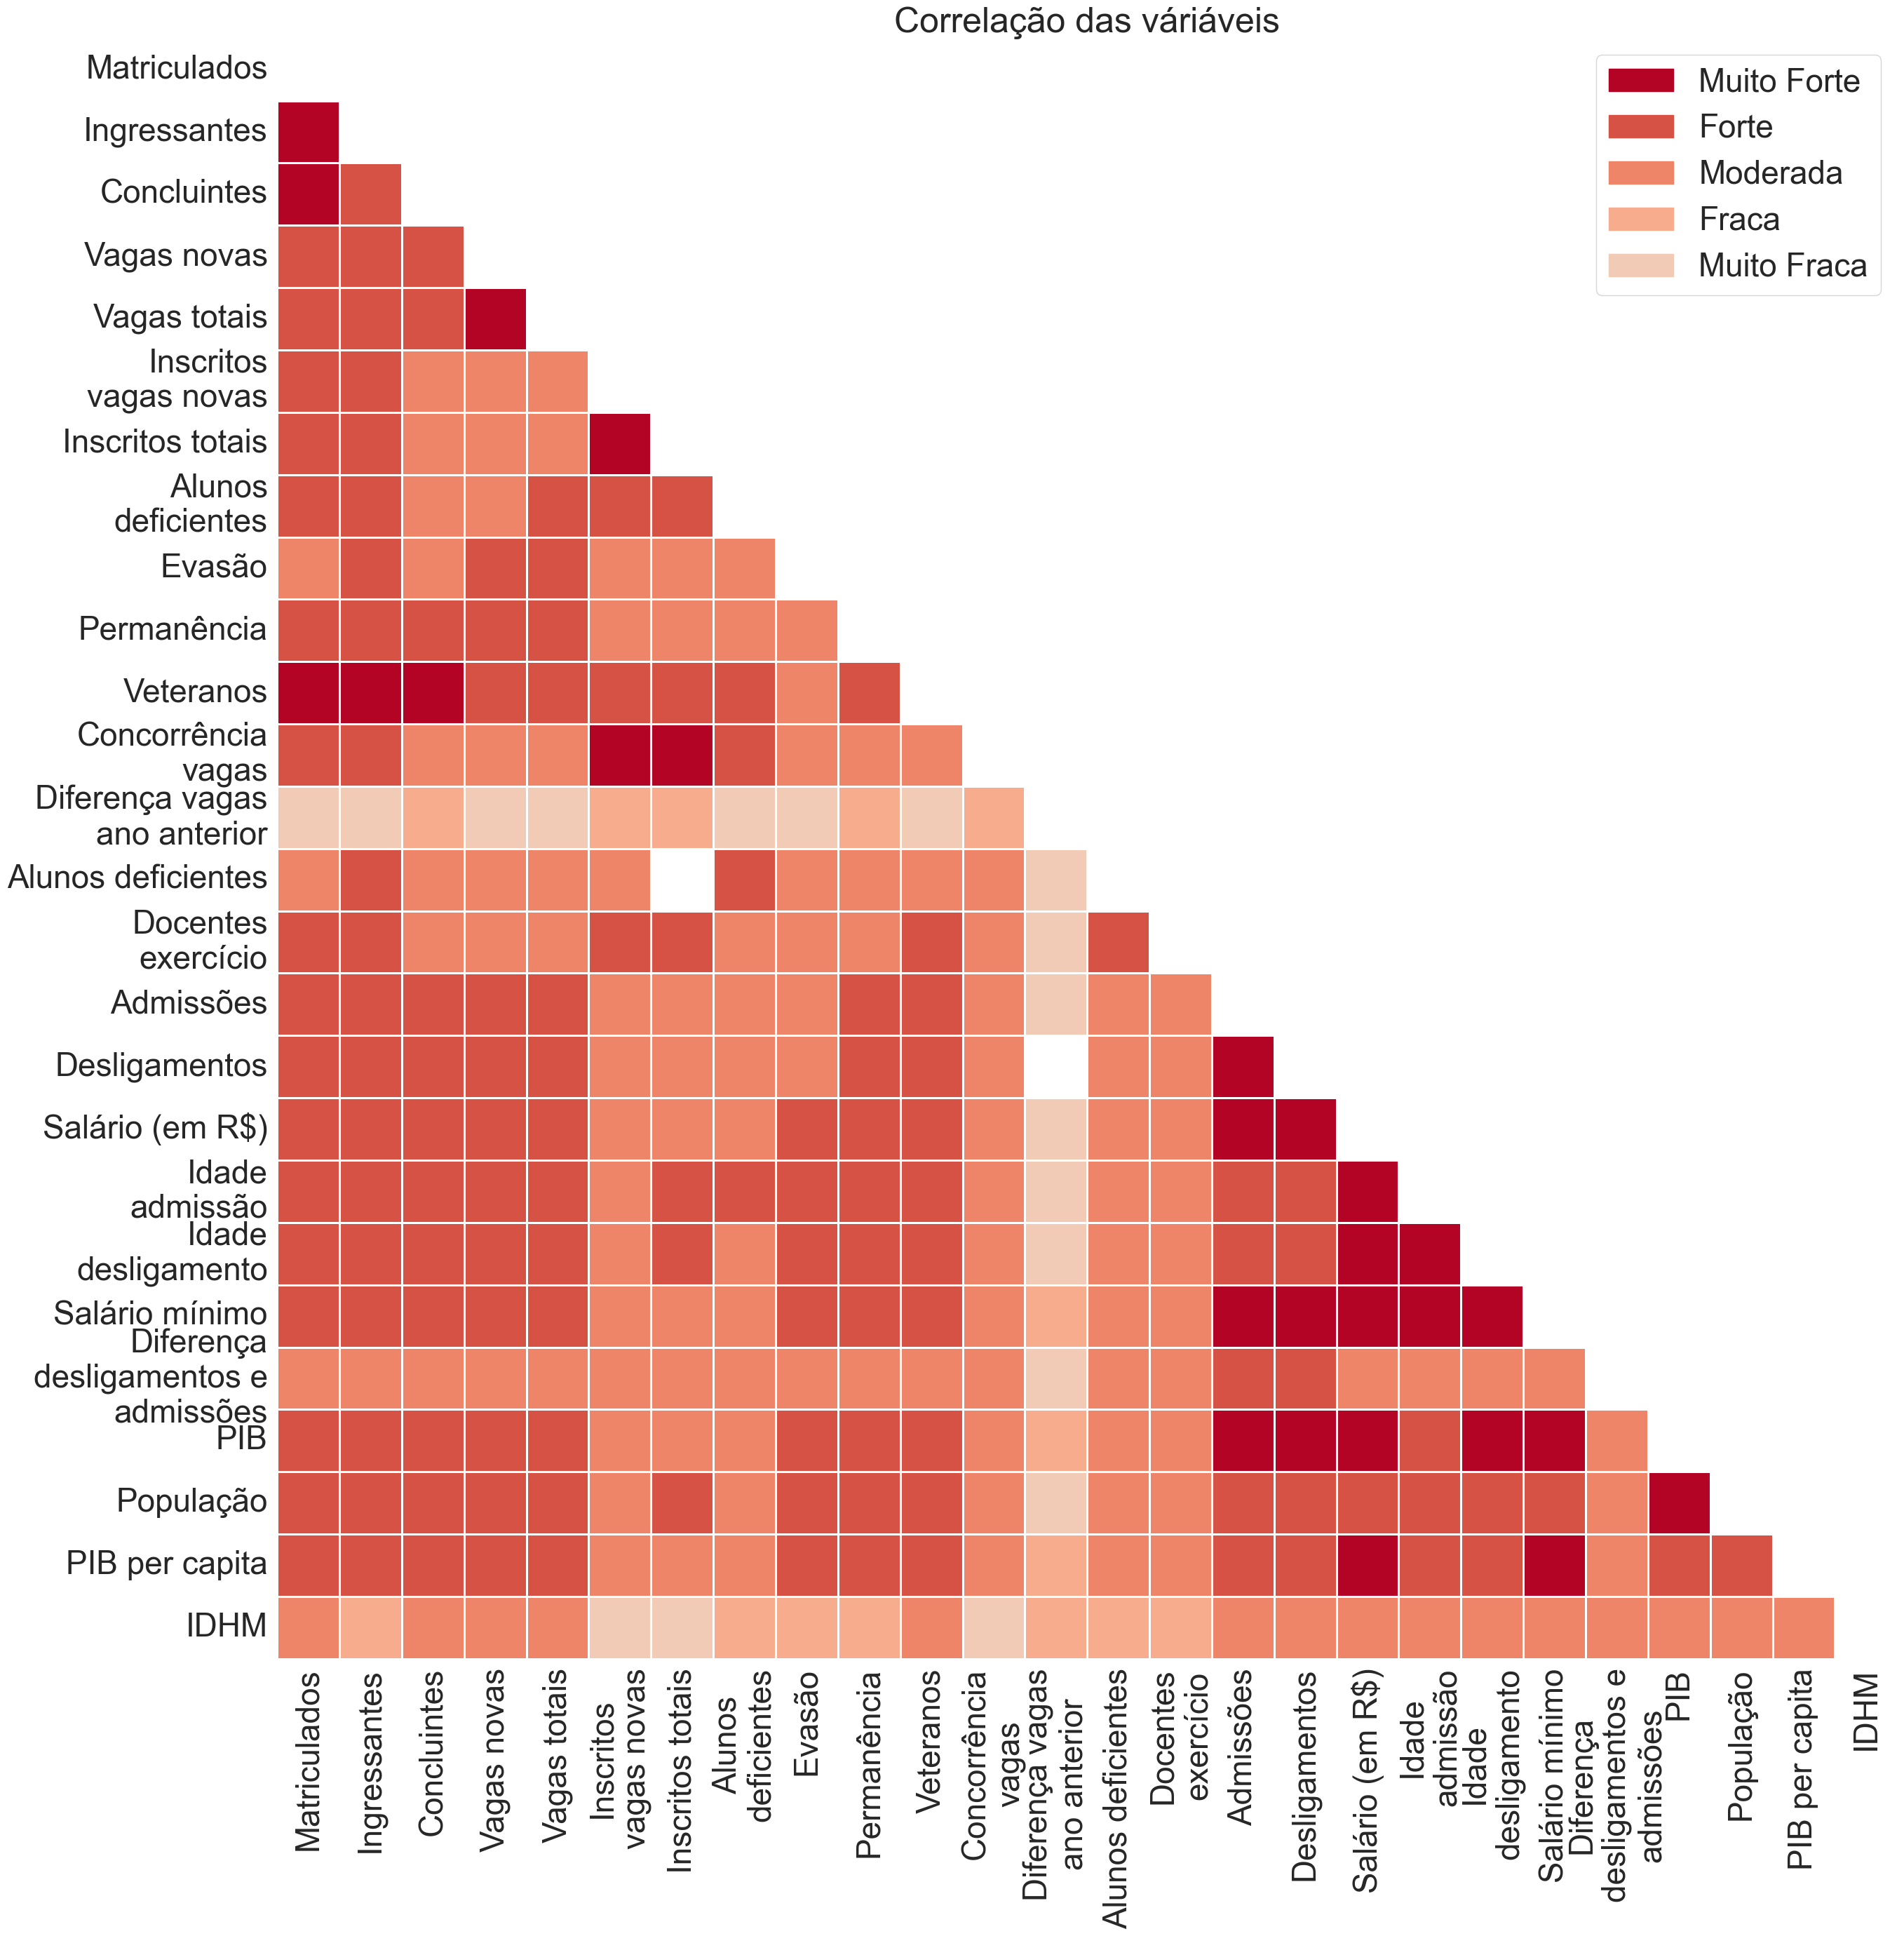

In [14]:
# showHeatMapOnlyColors(dataFrameGroup, var.INEP_COLUMNS + var.CAGED_COLUMNS + var.INEP_COLUMNS)
heatMap(dataFrameGroup, inep + caged + ibge)

In [15]:
dataFrameGroup.corr(method='spearman')

C:\Users\aliss\AppData\Local\Temp\ipykernel_19112\91707325.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataFrameGroup.corr(method='spearman')


,INEP_CURSO_QUANTIDADE_MATRICULADOS,INEP_CURSO_QUANTIDADE_INGRESSANTES,INEP_CURSO_QUANTIDADE_CONCLUINTES,INEP_CURSO_QUANTIDADE_VAGAS_NOVAS,INEP_CURSO_QUANTIDADE_VAGAS_TOTAL,INEP_CURSO_QUANTIDADE_INSCRITOS_VAGAS_NOVAS,INEP_CURSO_QUANTIDADE_INSCRITOS_TOTAL,INEP_CURSO_QUANTIDADE_ALUNOS_SITUACAO_TRANCADA,INEP_CURSO_QUANTIDADE_ALUNOS_SITUACAO_TRANSFERIDO,INEP_CURSO_QUANTIDADE_ALUNOS_APOIO_SOCIAL,...,CAGED_MUNICIPIO_ADMISSOES_IDADE,CAGED_MUNICIPIO_DESLIGAMENTOS_IDADE,CAGED_MUNICIPIO_HORA_CONTRATO,CAGED_MUNICIPIO_SALARIO_MINIMO,CAGED_MUNICIPIO_SALDO,CAGED_MUNICIPIO_DIFERENCA_ADMISSAO,IBGE_MUNICIPIO_PIB,IBGE_MUNICIPIO_POP,IBGE_MUNICIPIO_PIBPERCAPTA,IDHM
INEP_CURSO_QUANTIDADE_MATRICULADOS,1.000000,0.973256,0.917991,0.860142,0.855855,0.800634,0.855006,0.872668,0.701528,0.573554,...,0.878238,0.876210,0.863520,0.857445,-0.628426,0.628426,0.830213,0.841927,0.789850,0.407258
INEP_CURSO_QUANTIDADE_INGRESSANTES,0.973256,1.000000,0.863929,0.881173,0.879705,0.841069,0.880902,0.885601,0.705625,0.586923,...,0.865315,0.863873,0.844807,0.842453,-0.629804,0.629804,0.815379,0.822570,0.783394,0.392787
INEP_CURSO_QUANTIDADE_CONCLUINTES,0.917991,0.863929,1.000000,0.859195,0.848745,0.608081,0.678866,0.816230,0.661068,0.402321,...,0.885315,0.885305,0.872397,0.880853,-0.597715,0.597715,0.823767,0.821583,0.813113,0.530015
INEP_CURSO_QUANTIDADE_VAGAS_NOVAS,0.860142,0.881173,0.859195,1.000000,0.983059,0.647583,0.699843,0.834012,0.675044,0.364099,...,0.879613,0.876484,0.857132,0.873229,-0.598239,0.598239,0.830104,0.821630,0.823284,0.466582
INEP_CURSO_QUANTIDADE_VAGAS_TOTAL,0.855855,0.879705,0.848745,0.983059,1.000000,0.639712,0.690200,0.821690,0.708558,0.380887,...,0.869428,0.866940,0.853136,0.867473,-0.607376,0.607376,0.821952,0.811264,0.817402,0.463635
INEP_CURSO_QUANTIDADE_INSCRITOS_VAGAS_NOVAS,0.800634,0.841069,0.608081,0.647583,0.639712,1.000000,0.974199,0.684310,0.480364,0.690487,...,0.667782,0.663674,0.641528,0.607048,-0.474017,0.474017,0.628140,0.667010,0.557674,0.149091
INEP_CURSO_QUANTIDADE_INSCRITOS_TOTAL,0.855006,0.880902,0.678866,0.699843,0.690200,0.974199,1.000000,0.725940,0.517309,0.707228,...,0.719956,0.716688,0.691913,0.661511,-0.497353,0.497353,0.670737,0.715452,0.601957,0.176400
INEP_CURSO_QUANTIDADE_ALUNOS_SITUACAO_TRANCADA,0.872668,0.885601,0.816230,0.834012,0.821690,0.684310,0.725940,1.000000,0.675492,0.475639,...,0.837954,0.832711,0.824819,0.832478,-0.628156,0.628156,0.810557,0.796407,0.799711,0.433513
INEP_CURSO_QUANTIDADE_ALUNOS_SITUACAO_TRANSFERIDO,0.701528,0.705625,0.661068,0.675044,0.708558,0.480364,0.517309,0.675492,1.000000,0.406717,...,0.689068,0.689753,0.683919,0.703357,-0.553491,0.553491,0.638091,0.604909,0.681124,0.454172
INEP_CURSO_QUANTIDADE_ALUNOS_APOIO_SOCIAL,0.573554,0.586923,0.402321,0.364099,0.380887,0.690487,0.707228,0.475639,0.406717,1.000000,...,0.462075,0.467761,0.466665,0.397934,-0.422185,0.422185,0.385873,0.428277,0.368216,0.058024
